In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import  seaborn as sns

In [4]:
df = pd.read_csv('VNL2023.csv')

In [5]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [6]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [10]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df.shape

(131, 10)

In [15]:
#seeing the correlation of numberic data columns in our dataset 
numeric_cols = df.select_dtypes(include= ('int', 'float')).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


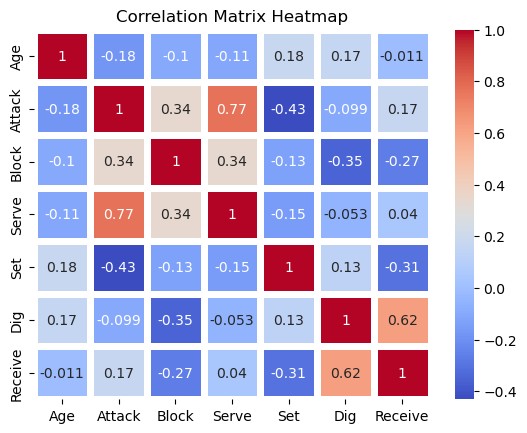

In [22]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
#seeing how many players play at a particular position
position_counts = df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

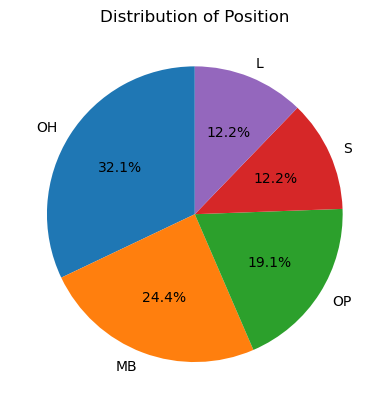

In [30]:
plt.pie(position_counts, labels= position_counts.index, autopct= "%1.1f%%", startangle=90)
plt.title("Distribution of Position")
plt.show()

In [55]:
avg_attack_by_country=df.groupby('Country')['Attack'].mean().sort_values(ascending=False)
avg_attack_by_country

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

In [56]:
top5_avg_attacking_countries = avg_attack_by_country.head()
top5_avg_attacking_countries

Country
France    6.670000
Japan     6.595000
Cuba      6.344286
Serbia    5.998750
Italy     5.965000
Name: Attack, dtype: float64

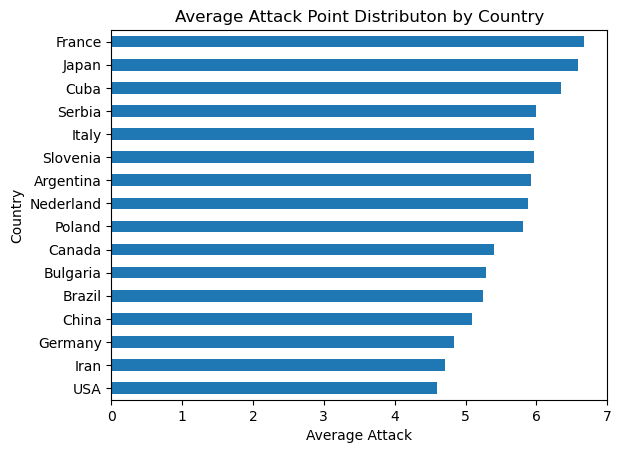

In [57]:
avg_attack_by_country.sort_values(ascending=True).plot(kind='barh')
plt.title('Average Attack Point Distributon by Country')
plt.xlabel('Average Attack')
plt.ylabel('Country')
plt.show()

In [60]:
avg_serve_by_age = df.groupby('Age')['Serve'].mean()
avg_serve_by_age.sort_values(ascending=False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [66]:
#Attack points of each positional player of each country 
each_country_positions_attack = df.groupby(['Country', 'Position'])['Attack'].max().reset_index().sort_values(ascending=False, by='Attack').head(20)
each_country_positions_attack

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [69]:
df.groupby('Country')['Dig'].sum().sort_values(ascending=False)

Country
France       38.59
Italy        35.89
Argentina    33.88
Slovenia     33.85
Poland       32.56
Japan        32.38
Serbia       30.64
USA          28.42
Canada       26.50
Brazil       24.61
Iran         24.25
Bulgaria     22.45
China        22.08
Nederland    21.84
Germany      20.92
Cuba         20.26
Name: Dig, dtype: float64

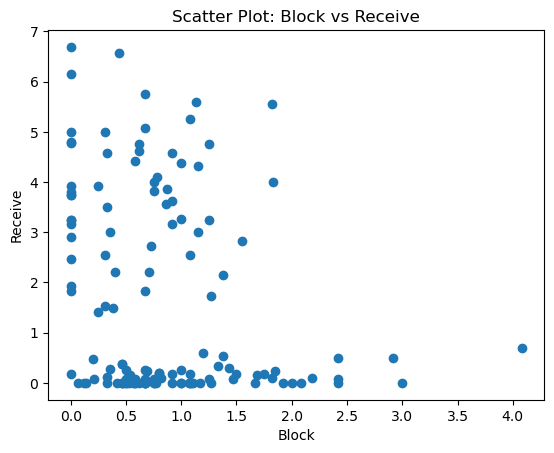

In [74]:
plt.scatter(df['Block'], df['Receive'])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel('Block')
plt.ylabel('Receive')
plt.show()

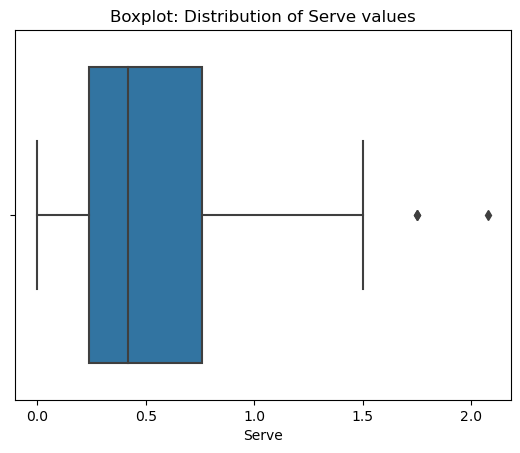

In [77]:
sns.boxplot(x = df['Serve'])
plt.title('Boxplot: Distribution of Serve values')
plt.show()

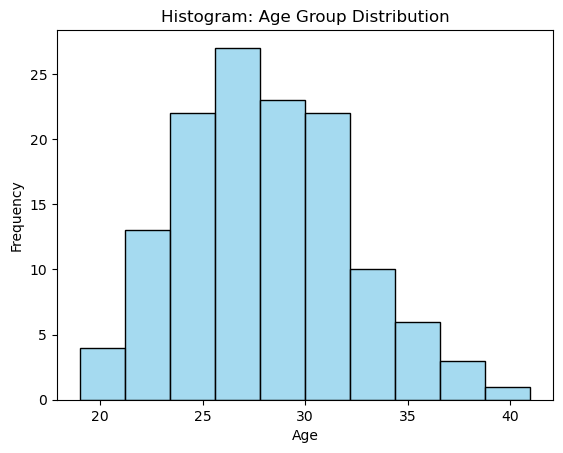

In [87]:
sns.histplot(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram: Age Group Distribution")
plt.ylabel('Frequency')
plt.show()

In [89]:
#avg attack by position
avg_attack_by_position = df.groupby("Position")["Attack"].mean()
avg_attack_by_position

Position
L     0.000000
MB    4.544688
OH    8.381667
OP    9.326000
S     0.536250
Name: Attack, dtype: float64

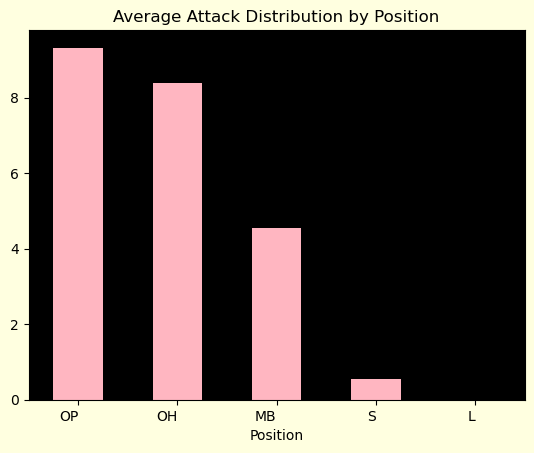

In [127]:
plt.figure(facecolor='lightyellow')
plt.rcParams['axes.facecolor'] = 'black'
avg_attack_by_position.sort_values(ascending=False).plot(kind='bar', color='lightpink')
plt.title("Average Attack Distribution by Position")
plt.xticks(rotation=0, ha='right')
plt.show()

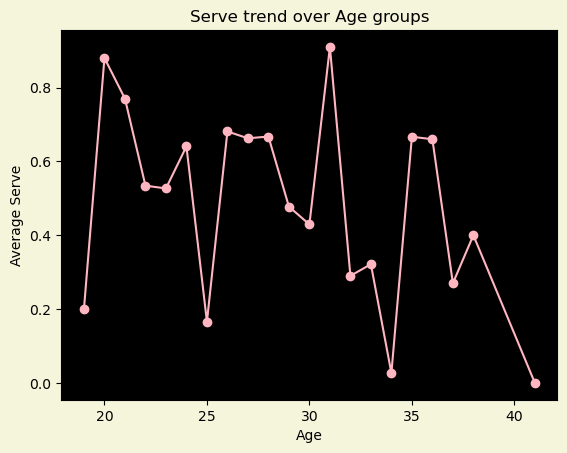

In [135]:
plt.figure(facecolor='beige')
plt.rcParams['axes.facecolor'] = 'black'
df.groupby("Age")['Serve'].mean().plot(kind='line',marker='o', color='lightpink')
plt.title('Serve trend over Age groups')
plt.xlabel('Age')
plt.ylabel('Average Serve')
plt.show()

In [139]:
total_attack_block_by_country = df.groupby('Country')[['Attack','Block']].sum()
total_attack_block_by_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


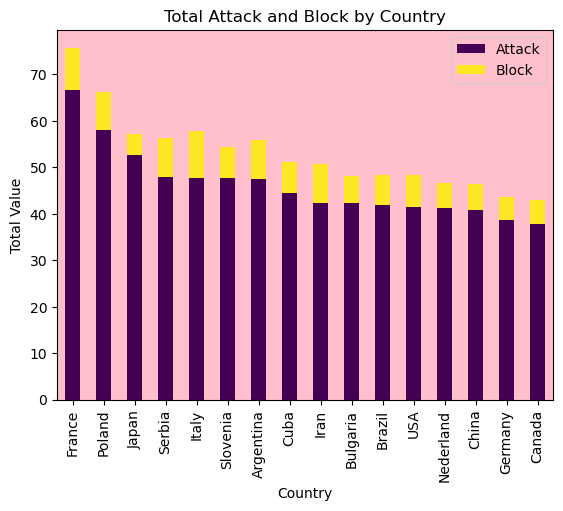

In [159]:
plt.rcParams['axes.facecolor'] = 'pink'
total_attack_block_by_country.sort_values(ascending=False, by='Attack').plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Attack and Block by Country')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.show()